In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu
from suite3d import nbtools as nbui
from suite3d import extension as ext

/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/transport.py:258: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [1]:
subjects_dir =   '/mnt/zortex-subjects/'
expt_info = { 
    'subject':         'TC030',
    'date' :          '2025-01-27',
    'expnum' :         [3,4],}
n_planes = 9
original_tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=False, get_si_params=False)

data_dir = '/mnt/md0/data/' + exp_str

os.makedirs(data_dir, exist_ok=True)

NameError: name 'flu' is not defined

In [10]:
original_tifs

['/mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00001.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00002.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00003.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00004.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00005.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00006.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00007.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00008.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00009.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/4/2025-01-27_4_TC030_2P_00001_00001.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/4/2025-01-27_4_TC030_2P_00001_00002.tif',
 '/mnt/zortex-subjects/TC030/2025-01-27/4/2025-01-27_4_TC030_2P_00001_00003.tif',
 '/mnt/zortex-su

In [11]:
dir_idx

NameError: name 'dir_idx' is not defined

In [13]:
import tifffile

In [15]:
n_leftover_planes = 0
tifs = []
leftover_planes = None
dir_idx_old = -1
for tif_idx, tif in enumerate(original_tifs):
    dir_idx = tif.split('/')[-2]
    if dir_idx_old != dir_idx:
        n_leftover_planes = 0
        dir_idx_old = dir_idx
    save_dir = os.path.join(data_dir, dir_idx)
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir,f"{tif_idx:05d}.tiff")
    tf = tifffile.TiffFile(tif)
    n_planes_tif = len(tf.pages)
    n_first_planes = (n_planes - n_leftover_planes) % n_planes
    
    
    n_full_frames = (n_planes_tif - n_first_planes) // n_planes
    n_new_leftovers = (n_planes_tif - n_first_planes) % n_planes

    all_frames = tf.asarray()

    if n_leftover_planes > 0:
        all_frames = n.concatenate([leftover_planes, all_frames],axis=0)

    full_frames = all_frames[:n_planes_tif+n_leftover_planes-n_new_leftovers]
    leftover_planes = all_frames[n_planes_tif+n_leftover_planes-n_new_leftovers:]

    print(f"Tif {tif_idx:03d} has {n_planes_tif} planes. Path: {tif}")
    print(f"First {n_first_planes} planes complete the {n_leftover_planes} from the previous tif to form a full frame")
    
    n_leftover_planes = n_new_leftovers
    print(f"Of the remaining {n_planes_tif - n_first_planes}, we complete {n_full_frames} frames with {n_full_frames * n_planes} planes")
    print(f"This leaves {n_leftover_planes} planes to be completed by the next tif")
    mov = full_frames.reshape(-1, *full_frames.shape[1:])
    print(f"Saving movie of shape {mov.shape} to {save_path}")
    tifffile.imsave(save_path, mov, dtype=mov.dtype)
    tifs.append(save_path)

Tif 000 has 2000 planes. Path: /mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00001.tif
First 0 planes complete the 0 from the previous tif to form a full frame
Of the remaining 2000, we complete 222 frames with 1998 planes
This leaves 2 planes to be completed by the next tif
Saving movie of shape (1998, 512, 512) to /mnt/md0/data/TC030_2025-01-27_3-4/3/00000.tiff
Tif 001 has 2000 planes. Path: /mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00002.tif
First 7 planes complete the 2 from the previous tif to form a full frame
Of the remaining 1993, we complete 221 frames with 1989 planes
This leaves 4 planes to be completed by the next tif
Saving movie of shape (1998, 512, 512) to /mnt/md0/data/TC030_2025-01-27_3-4/3/00001.tiff
Tif 002 has 2000 planes. Path: /mnt/zortex-subjects/TC030/2025-01-27/3/2025-01-27_3_TC030_2P_00001_00003.tif
First 5 planes complete the 4 from the previous tif to form a full frame
Of the remaining 1995, we complete 221 fra

In [144]:
exp_str

'TC030_2025-01-27_3-4'

In [106]:

vol_rate = 30 / 9

job_params = {   
    'lbm' : False,
    # number of channels recorded in the tiff file, typically 30
    'n_ch_tif' : 9,
    # convert from the Scanimage channel ordering to deep-to-shallow ordering
    # in our case, ScanImage channel numbers are in temporal order. 
    'planes' : n.arange(n_planes),
    'multiplane_2p_use_planes' : n.array([1,2,3,4,5,6, 7, 8]),
    # number of files to use for the initial pass
    'n_init_files' :   3,
    'init_file_pool' : [(0, 6)],

    # volume rate in acquisition
    'fs' : vol_rate,
    'lbm' : False,
    'subtract_crosstalk' : False,
    'fuse_strips' : False,
    
    # 3D GPU registration - fast! 
    # for now, 3D + GPU are well-tested, other options might have minor bugs
    # if you run into them, let us know! we'll fix them
    '3d_reg' : True,
    'gpu_reg' : True,
}


savedir = os.path.join('/mnt/md0/runs', expt_info['subject'], expt_info['date'])
os.makedirs(savedir, exist_ok=True)

# Create the job
# 'TC030_2025-01-27_3-4'
job = Job('/mnt/md0/runs',exp_str, tifs = tifs,
          params=job_params, create=True, overwrite=True, verbosity = 3)

Job directory /mnt/md0/runs/s3d-TC030_2025-01-27_3-4 already exists
Loading job directory for TC030_2025-01-27_3-4 in /mnt/md0/runs
   Loading dirs 
      Found dir registered_fused_data
      Found dir summary
      Found dir iters
   Loading default params
      Updating param lbm
      Updating param n_ch_tif
      Updating param planes
      Updating param multiplane_2p_use_planes
      Updating param n_init_files
      Updating param init_file_pool
      Updating param fs
      Updating param subtract_crosstalk
      Updating param fuse_strips
      Updating param 3d_reg
      Updating param gpu_reg
   Updated main params file


In [107]:
job.run_init_pass()

   Saved a copy of params at /mnt/md0/runs/s3d-TC030_2025-01-27_3-4/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-TC030_2025-01-27_3-4/summary/summary.npy
   Loading init tifs with 9 channels
      Loading tiff 1/3: /mnt/md0/data/TC030_2025-01-27_3-4/3/00001.tiff
      Loading tiff 2/3: /mnt/md0/data/TC030_2025-01-27_3-4/3/00003.tiff
      Loading tiff 3/3: /mnt/md0/data/TC030_2025-01-27_3-4/3/00004.tiff
   Loaded 3 files, total 2.61 GB
   Loaded movie with 667 frames and shape 8, 512, 512
      Enforcing positivity in mean image
   No crosstalk estimation or subtraction
   Using 3d registration
   Computing plane alignment shifts
   Applying plane alignment shifts
   Launching 3D GPU reference image calculation
      Seeding reference image with most active frames
      Completed iter 1 out of 8 in  4.92s using  85/667 frames
      Completed iter 2 out of 8 in  5.36s using  159/667 frames
      Completed iter 3 out of 8 in  5.76s using 

In [108]:
sum = job.load_summary()

In [109]:
job.register()

      Found dir /mnt/md0/runs/s3d-TC030_2025-01-27_3-4/registered_fused_data
      Updating self.dirs tag registered_fused_data
   Saved a copy of params at /mnt/md0/runs/s3d-TC030_2025-01-27_3-4/registered_fused_data
   Updated main params file
   Starting registration: 3D: True, GPU: True
   Not clipping frames for registration
Will analyze 18 tifs in 18 batches
   Enforcing positivity
   Launching IO thread
         Memory at batch 0.  Total Used: 085.836 GB, Virtual Available: 418.564 GB, Virtual Used: 084.632 GB, Swap Used: 001.204 GB
Loading Batch 0 of 17
      Loading tiff 1/1: /mnt/md0/data/TC030_2025-01-27_3-4/3/00000.tiff
   Loaded 1 files, total 0.87 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 088.504 GB, Virtual Available: 415.896 GB, Virtual Used: 087.300 GB, Swap Used: 001.204 GB
         Memory after movie copied from threadTotal Used: 089.828 GB, Virtual Available: 414.572 GB, Virtual Used: 088.624 GB, Swap Used: 001.204 GB
         Me

/home/ali/packages/s2p-lbm/suite3d/quality_metrics.py:41: RuntimeWarning: invalid value encountered in divide
  dff = df / fs.mean(axis=1,keepdims=True)
/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


         After full batch saving:Total Used: 113.515 GB, Virtual Available: 390.885 GB, Virtual Used: 112.311 GB, Swap Used: 001.204 GB
         Memory at batch 2.  Total Used: 113.517 GB, Virtual Available: 390.883 GB, Virtual Used: 112.312 GB, Swap Used: 001.204 GB
Loading Batch 2 of 17
   Batch 2 IO thread joined
         Memory after IO thread joinTotal Used: 113.518 GB, Virtual Available: 390.882 GB, Virtual Used: 112.314 GB, Swap Used: 001.204 GB
         Memory after movie copied from threadTotal Used: 112.984 GB, Virtual Available: 391.416 GB, Virtual Used: 111.780 GB, Swap Used: 001.204 GB
         Memory after thread memory clearedTotal Used: 111.917 GB, Virtual Available: 392.483 GB, Virtual Used: 110.712 GB, Swap Used: 001.204 GB
   Launching IO thread for next batch
         After IO thread launch:Total Used: 111.919 GB, Virtual Available: 392.481 GB, Virtual Used: 110.714 GB, Swap Used: 001.204 GB
      Loaded batch of size (8, 222, 512, 512)
      Loading tiff 1/1: /mnt/

In [110]:
reg = job.load_registration_results()

In [111]:
intshift = n.concatenate(reg['int_shift'])
float_shift = n.concatenate(reg['sub_pixel_shifts'])

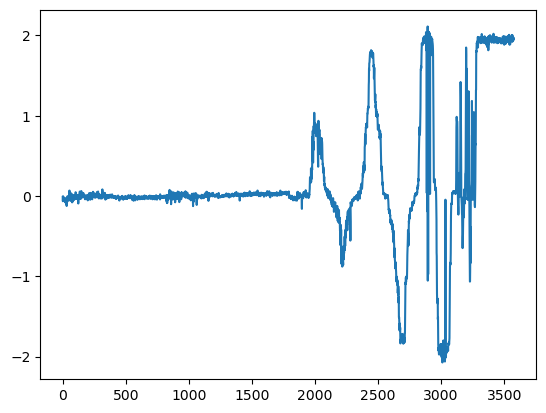

In [112]:
plt.plot(float_shift[:,0])

In [142]:
tz = [
    -100, 1350.4,
    7, 1350.4,
    8, 1351.4,
    9, 1355.0,
    10, 1355.1,
    11, 1355.4,
    12, 1355.8,
    13, 1356.9, 
    14, 1358.2,
    15, 1358.1, 
    16, 1358.1, 
    17, 1358.2, 
    18, 1360.1,
    19, 1360.6,
    20, 1360.6,
    21, 1360.6,
    23, 1360.5,
    27, 1360.0,
    28, 1358.8,
    29, 1358.8,
    30, 1358.9,
    31, 1358.9,
    32, 1358.1,
    33, 1357.9,
    34, 1358.0,
    35, 1357.9,
    36, 1357.8,
    37, 1357.8,
    38, 1357.2,
    39, 1356.2,
    40, 1356.2,
    41, 1356.1,
    42, 1355.2,
    43, 1353.4,
    44, 1353.1, 
    45, 1353.0,
    46, 1353.0,
    47, 1352.5,
    48, 1352.5,
    49, 1350.8,
    50, 1350.8,
    51, 1350.8,
    52, 1350.3, 
    53, 1349.9,
    54, 1349.9,
    55, 1349.9,
    58, 1349.9,
    59, 1349.5,
    60, 1347.6,
    61, 1347.6,
    62, 1346.8,
    63, 1346.7,
    64, 1346.7,
    65, 1345.8,
    66, 1345.2,
    67, 1345.3, 
    68, 1345.2, 
    69, 1345.1, 
    70, 1344.6,
    71, 1344.7, 
    72, 1344.6,
    73, 1344.6,
    74, 1343.9,
    75, 1343.4,
    76, 1343.4, 
    78, 1343.4,
    79, 1343.1,
    80, 1342.9,
    81, 1341.6,
    82, 1341.3,
    83, 1341.3,
    84, 1340.6, 
    85, 1340.5,
    86, 1339.8,
    87, 1339.8,
    89, 1339.8,
    90,1340.8,
    91, 1342.2,
    92, 1342.2,
    93, 1342.2,
    94, 1342.7,
    95, 1343.2,
    96, 1343.2,
    97, 1343.1,
    98, 1343.7,
    99, 1345.2,
    100,1345.2,
    101, 1345.2,
    102, 1345.2,
    103, 1345.2,
    104, 1345.7, 
    105, 1346.8, 
    106, 1347.3, 
    107, 1347.3,
    108, 1347.3,
    109, 1348.4,
    110, 1348.8,
    111, 1348.8,
    112, 1348.8,
    113, 1349.4,
    114, 1349.7,
    115, 1349.9,
    116, 1349.9,
    117, 1350.2,
    128, 1350.2, 
    129, 1350.6,
    130, 1352.5, 
    131, 1353.5,
    132, 1353.6,
    133, 1353.8,
    134, 1355.0,
    135, 1355.9,
    136, 1357.0, 
    137, 1357.0,
    138, 1357.1,
    139, 1357.4,
    140, 1359.4,
    141, 1360.5,
    142, 1361.6,
    143, 1361.6,
    144, 1361.6,
    145, 1361.7,
    146, 1364.7,
    147, 1364.6,
    148, 1364.6,
    149, 1367.0,
    150, 1367.9,
    151, 1369.3, 
    152, 1370.3,
    153, 1370.3,
    155, 1370.3,
    157, 1370.3,
    158, 1369.2,
    159, 1369.2,
    160, 1368.0,
    161, 1367.4,
    162, 1367.3,
    163, 1366.1,
    164, 1365.4,
    165, 1364.2,
    166, 1363.6,
    167, 1362.6,
    168, 1362.6,
    169, 1362.6,
    170, 1361.1,
    171, 1360.5,
    172, 1360.5,
    173, 1360.5,
    174, 1359.9,
    175, 1359.7,
    176, 1359.8,
    177, 1359.2,
    178, 1357.5,
    179, 1356.9, 
    180, 1355.7,
    181, 1354.7,
    182, 1354.3,
    183, 1351.9, 
    184, 1350.9,
    185, 1350.9,
    186, 1351.0,
    187, 1350.6,
    188, 1349.9,
    189, 1349.8,
    193, 1349.9,
    194, 1349.7,
    195, 1348.0, 
    196, 1345.2,
    197, 1345.2,
    198, 1345.1,
    199, 1343.9,
    200, 1343.7,
    201, 1343.4,
    202, 1342.7,
    203, 1342.4,
    204, 1342.3,
    205, 1342.3,
    206, 1341.7,
    207, 1341.2,
    208, 1340.6,
    209, 1340.7,
    210, 1340.0,
    211, 1339.2,
    212, 1338.7,
    213, 1338.0,
    214, 1336.9,
    215, 1336.3,
    216, 1336.4,
    217, 1335.7,
    218, 1334.6,
    219, 1334.5,
    220, 1334.1,
    221, 1333.8,
    222, 1332.3,
    223, 1331.9,
    224, 1330.4, 
    225, 1330.3,
    226, 1330.3,
    227, 1330.3,
    228, 1330.3,
    233, 1330.3,
    234, 1331.2, 
    235, 1333.2,
    236, 1335.6,
    237, 1336.8, 
    238, 1336.8,
    239, 1336.8,
    240, 1339.0,
    241, 1341.1,
    242, 1341.1,
    243, 1341.1,
    244, 1343.9,
    245, 1344.0,
    246, 1344.0,
    247, 1345.1,
    248, 1345.9,
    249, 1345.9,
    250, 1345.9,
    251, 1345.9,
    252, 1346.9,
    253, 1346.9,
    254, 1347.3,
    255, 1347.2,
    256, 1347.2,
    257, 1348.2,
    258, 1348.6,
    259, 1350.0,
    260, 1350.5,
    261, 1350.6,  

    354, 1350.6,
    356, 1350.6,
    357, 1358.6,
    358, 1360.3,
    359, 1360.3, 
    360, 1357.3,
    361, 1345.0, 
    362, 1345.1,
    363, 1355.0,
    364, 1349.2,
    365, 1348.2, 
    366, 1348.6,
    367, 1364.0, 
    368, 1351.2,
    369, 1347.0,
    370, 1345.2,
    371, 1341.1,
    372, 1339.0,
    373, 1340.3, 
    374, 1348.5,
    375, 1342.8,
    376, 1350.6, 
    377, 1350.2,
    378, 1354.8,
    379, 1354.8,
    380, 1367.7,
    381, 1359.9,
    382, 1359.9,
    383, 1347.0,
    384, 1347.0,
    385, 1351.0,
    386, 1365.8,
    387, 1360.6,
    388, 1345.1,
    389, 1336.1,
    390, 1335.8,
    391, 1343.1,
    392, 1346.0,
    393, 1351.6,
    394, 1363.0,
    395, 1352.1, 
    396, 1347.1, 
    397, 1350.5,
    398, 1358.1,
    399, 1351.9,
    400, 1356.4,
    401, 1345.5,
    402, 1353.4,
    403, 1358.3,
    404, 1365.4,
    405, 1369.6,
    406, 1372.0,
    407, 1374.0, 
    408, 1374.0,
    409, 1382.1,
    410, 1381.5,
    411, 1381.5,
    412, 1380.7,
    413, 1380.2, 
    414, 1380.0,
    415, 1380.0,
    450, 1380.0
    
    
]
tz = n.array(tz)

tz = tz.reshape(-1,2)
tz[:,0] += 579


In [143]:
n.save('/mnt/md0/s3d-figures/fig3/zshift-vid/zs.npy', tz)

In [141]:
tz.shape

(291, 2)

In [118]:
nt = float_shift.shape[0]

In [119]:
ts = n.arange(nt) / job.params['fs']

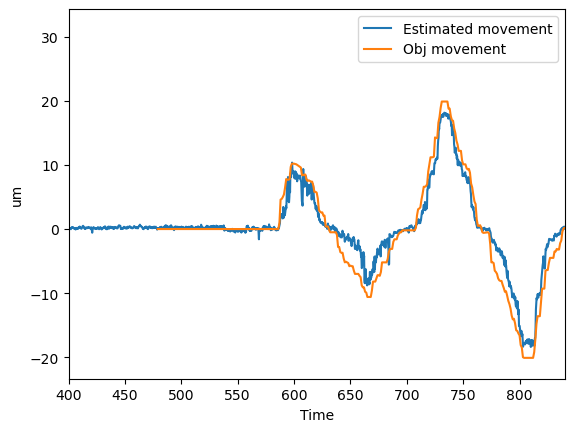

In [138]:
plt.plot(ts, float_shift[:,0] * 10, label='Estimated movement')
plt.plot(tz[:,0] + 579, tz[:,1] - tz[0,1], label='Obj movement')
plt.xlim(400,840)
plt.gca().set_ylabel("um")
plt.gca().set_xlabel("Time")
plt.legend()

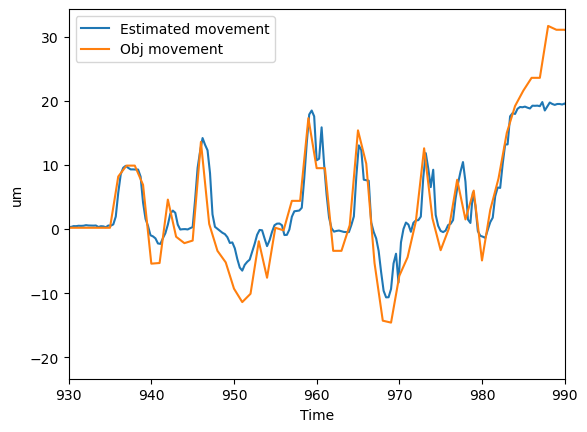

In [139]:
plt.plot(ts, float_shift[:,0] * 10, label='Estimated movement')
plt.plot(tz[:,0] + 579, tz[:,1] - tz[0,1], label='Obj movement')
plt.xlim(930,990)
plt.gca().set_ylabel("um")
plt.gca().set_xlabel("Time")
plt.legend()

In [44]:
job.params['intensity_thresh'] = 1

In [47]:
cmap = job.calculate_corr_map()

      Found dir /mnt/md0/runs/s3d-TC030_2025-01-27_3-4/corrmap
      Updating self.dirs tag corrmap
      Found dir /mnt/md0/runs/s3d-TC030_2025-01-27_3-4/mov_sub
      Updating self.dirs tag mov_sub
   Saved a copy of params at /mnt/md0/runs/s3d-TC030_2025-01-27_3-4/corrmap
   Updated main params file
   Computing correlation map of movie with 3576 frames, volume shape: 7, 512, 516
      Running batch 1 of 18
         Timer prep completed in 1.135 sec
         Timer batch_setup completed in 0.359 sec
         Timer batch_edgecrop completed in 0.026 sec
         Timer accum_meanmeax completed in 0.300 sec
         Timer batch_rolling_mean_filt completed in 0.288 sec
         Timer batch_accum_sdmov completed in 0.893 sec
         Timer batch_norm_sdmov completed in 0.148 sec
         Loading movie into shared memory
         Timer dtu_shmem completed in 1.225 sec
         Subtracting neuropil and applying cell filters
         Timer dtu_npsub_conv3d completed in 3.152 sec
         Redu

In [48]:

corr_map_thresh = ext.thresh_mask_corr_map(cmap, thresh_window_size_pix = 51, corrmap_thresh_pct = 50)

NameError: name 'corr_map' is not defined

In [ ]:
# most important parameter - any value of the corrmap
# above this will be considered a peak for a possible ROI,
# and will be used as a "seed" to grow an ROI around it
# bigger number: fewer ROIs, only bright ones
# smaller number: many ROIs, increasingly worse quality
job.params['peak_thresh'] = 0.00

# optionally, bin the movie in time to speed up detection
# probably a good idea if you have high framerate (>5 Hz?)
job.params['detection_timebin'] = 1 

# when extending an ROI, compare its activity to its neighboring pixels
# in frames where the fluorescence is above this percentile
job.params['percentile'] : 99.9
job.params['activity_thresh'] = 5
job.params['extend_thresh'] = 0.015
job.params['max_iter'] = 5000
job.params['n_proc_detect'] = 16


job.segment_rois(vmap = corr_map_thresh)